<a href="https://colab.research.google.com/github/lov435/SOEmotions/blob/main/Score_Types_Heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the required classes



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### List of the 28 GoEmotions

In [2]:
emotions = [
    'admiration',
    'amusement',
    'anger',
    'annoyance',
    'approval',
    'caring',
    'confusion',
    'curiosity',
    'desire',
    'disappointment',
    'disapproval',
    'disgust',
    'embarrassment',
    'excitement',
    'fear',
    'gratitude',
    'grief',
    'joy',
    'love',
    'nervousness',
    'optimism',
    'pride',
    'realization',
    'relief',
    'remorse',
    'sadness',
    'surprise',
    'neutral',
]

### Read the emotions prediction spreadsheet

In [3]:
url='https://drive.google.com/file/d/1WyIDTtuaf2wFdDhXdV4QPE-uhgom5Cqq/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

### Group by the seven groups ('Group' column) and merge the emotions for that group into a list so that we have everything grouped by 'Group'.

In [4]:
df = df[['Group', 'GoEmotion']]
df = df.groupby(['Group'], as_index = False).agg({'GoEmotion': ';'.join});
print(df)

         Group                                          GoEmotion
0     Addition  ['neutral']  [0.9985];['neutral']  [0.9989];['...
1    Advantage  ['neutral']  [0.9286];['neutral']  [0.9985];['...
2  Improvement  ['neutral']  [0.9990];['neutral']  [0.9986];['...
3      Inquiry  ['confusion', 'neutral']  [0.3435, 0.4133];['n...
4   Irrelevant  ['neutral']  [0.9986];['neutral']  [0.9991];['...
5       Praise  ['admiration']  [0.9937];['neutral']  [0.9974]...
6     Weakness  ['anger']  [0.4677];['neutral']  [0.9849];['ne...


### Create 1 column for each of the 28 emotions. Populate each column with the sum of emotion scores for that group.

---



In [5]:
dict = {}
for index, row in df.iterrows():
  for emotion in emotions:
    total=0.0
    string = row['GoEmotion']
    for tex in string.split(';'):
      emos = [x.strip(" '") for x in tex.split('  ')[0].strip('[]').split(',')]
      scores = [x.strip(" '") for x in tex.split('  ')[1].strip('[]').split(',')]
      if emotion in emos:
        total = total + float(scores[emos.index(emotion)])
    dict[(row['Group'], emotion)] = total

for emotion in emotions:
  lst = []
  for index, row in df.iterrows():
    lst.append(dict[(row['Group'], emotion)])
  df[emotion] = lst



### Set the 'Group' column as index of the dataframe for ease of plotting and drop the 'GoEmotion' column as it is not needed anymore.

In [6]:
df.set_index("Group", inplace = True)
df = df.drop('GoEmotion', axis=1)

### Set the plot size and print the heatmap.

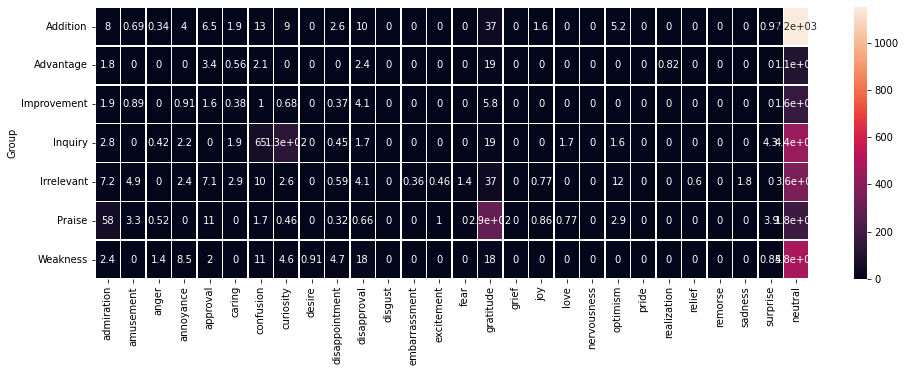

In [7]:
plt.figure(figsize = (16,5))
sns.heatmap(df, annot=True, linewidths=.5)

### Drop the 'Neutral' column for reprinting the heatmap

In [8]:
df = df.drop('neutral', axis=1)


### Reprint the heatmap

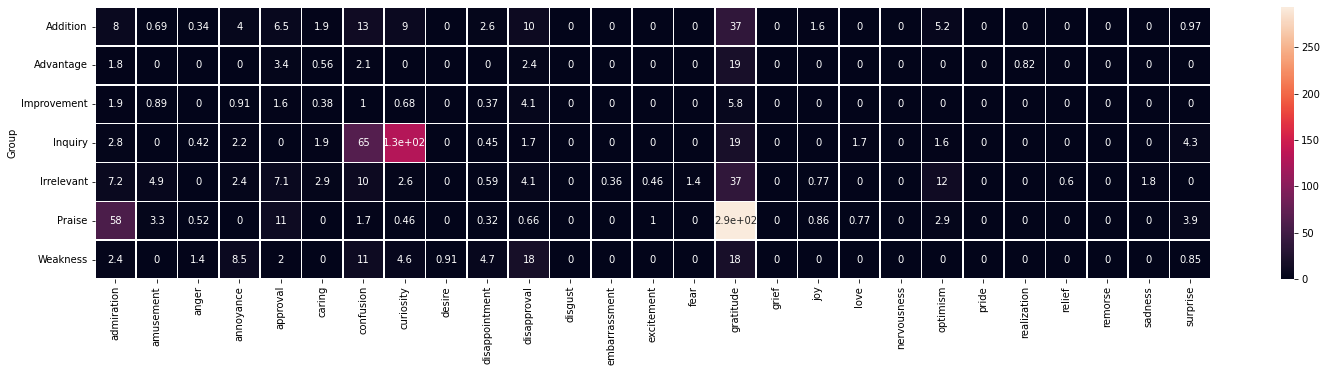

In [9]:
plt.figure(figsize = (25,5))
sns.heatmap(df, annot=True, linewidths=.5)